## Classification demo including training

In [1]:
import tensorflow as tf

In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [6]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [8]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
## Importing training data
train_set = train_datagen.flow_from_directory(r'D:\Term 3\Artificial Intelligence\datas\dataset\training_set',
                                               target_size=(64, 64),
                                               batch_size=6,
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [11]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [13]:
## Importng test data
test_set = test_datagen.flow_from_directory(r'D:\Term 3\Artificial Intelligence\datas\dataset\test_set',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


In [14]:
! pip install pillow

In [15]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50/50 [==============================] - 6s 110ms/step - loss: 0.7000 - acc: 0.4868 - val_loss: 0.6967 - val_acc: 0.5000
Epoch 2/5
50/50 [==============================] - 4s 71ms/step - loss: 0.6904 - acc: 0.5536 - val_loss: 0.6807 - val_acc: 0.5288
Epoch 3/5
50/50 [==============================] - 3s 69ms/step - loss: 0.6610 - acc: 0.6165 - val_loss: 0.6028 - val_acc: 0.7647
Epoch 4/5
50/50 [==============================] - 3s 70ms/step - loss: 0.6278 - acc: 0.6567 - val_loss: 0.6137 - val_acc: 0.7356
Epoch 5/5
50/50 [==============================] - 4s 71ms/step - loss: 0.6017 - acc: 0.6733 - val_loss: 0.6228 - val_acc: 0.7598


In [16]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('D:\Term 3\Artificial Intelligence\datas\dataset\single_prediction\cat2.jpg'
                           ,target_size =(64,64))


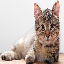

In [17]:
test_image

In [18]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [19]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=test_image.reshape(1,64,64,3)

In [20]:
result = classifier.predict(test_image)

In [21]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [22]:
prediction

'cat'

In [24]:
#saving weights
#serialize model to json
model_json = classifier.to_json()
with open("model.json",'w') as json_file:
    json_file.write(model_json)
#serialize weights to hdfs
classifier.save_weights('model.h5')
print('save model to disk')

save model to disk
